In [1]:
using Turing, Distributions
using PyPlot, PyCall
using Mamba: describe

[Turing]: AD chunk size is set as 40


In [2]:
y = [ 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 1.0, 1.0 ];
N = length(y);  K = 3;

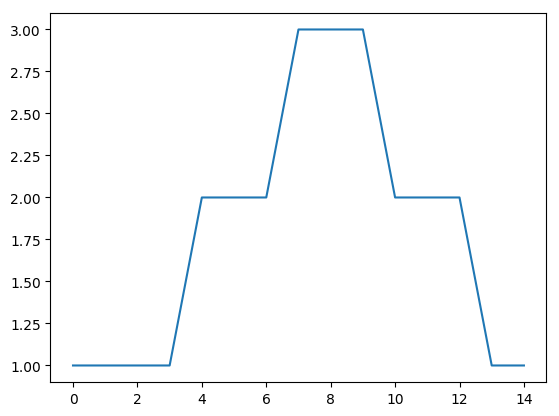

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9d37776490>

In [3]:
plot(y)

In [5]:
@model BayesHmm(y) = begin
    s = tzeros(Int, N)
    m = Vector{Real}(K)
    T = Vector{Vector{Real}}(K)
    for i = 1:K
        T[i] ~ Dirichlet(ones(K)/K)
        # m[i] ~ Normal(1, 0.1) # Defining m this way causes label-switching problem.
        m[i] ~ Normal(i, 0.01)
    end
    s[1] ~ Categorical(ones(Float64, K)/K)
    for i = 2:N
        s[i] ~ Categorical(vec(T[s[i-1]]))
        y[i] ~ Normal(m[s[i]], 0.01)
    end
    return(s, m)
end

BayesHmm (generic function with 2 methods)

In [11]:
g = Gibbs(500, HMC(1, 0.2, 3, :m, :T), PG(50, 1, :s))
c = sample(BayesHmm(y), g);

[Turing]:  Assume - `T` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Assume - `m` is a parameter (ignoring `m` found in global scope)
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Assume - `s` is a parameter (ignoring `s` found in global scope)
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Observe - `y` is an observation
 @~(::ANY, ::ANY) at compiler.jl:57


[Gibbs] Sampling... 99%  ETA: 0:00:01

[Gibbs] Finished with
  Running time    = 53.564168918000036;


[Gibbs] Sampling...100% Time: 0:00:54


In [12]:
describe(c)

Iterations = 1:500
Thinning interval = 1
Chains = 1
Samples per chain = 500

Empirical Posterior Estimates:
               Mean                     SD                           Naive SE                        MCSE                 ESS   
T[2][1]  4.792786378×10⁻¹    0.0000000000000015003021363   0.000000000000000067095551270   0.000000000000000000000000 500.000000
T[2][2]  2.784222581×10⁻¹    0.0000000000000001667002374   0.000000000000000007455061252   0.000000000000000000000000 500.000000
T[2][3]  2.422991041×10⁻¹    0.0000000000000003611838476   0.000000000000000016152632713   0.000000000000000013877788 500.000000
 lf_num     2.9940000×10⁰    0.1341640786499871118575555   0.005999999999999987981835758   0.005999999999999961093622 500.000000
   s[2]     3.0000000×10⁰    0.0000000000000000000000000   0.000000000000000000000000000   0.000000000000000000000000        NaN
   s[4]     3.0000000×10⁰    0.0000000000000000000000000   0.000000000000000000000000000   0.000000000000000000000000 

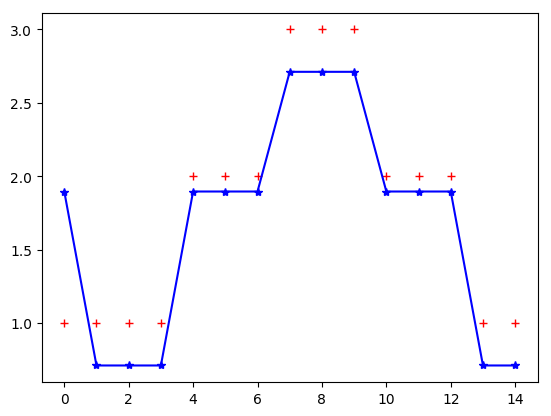

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9d33551050>

In [14]:
m = c[:m][111];
s = c[:s][111];
PyPlot.plot(y, linestyle="None", marker="+", color = "r")
PyPlot.plot(m[s], linestyle="-", marker="*", color = "b")